In [2]:
#hide
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

^C


ModuleNotFoundError: No module named 'fastbook'

  ERROR: Command errored out with exit status 1:
   command: 'C:\Python310\python.exe' 'C:\Users\bdacosta\AppData\Local\Temp\pip-standalone-pip-icmetf89\__env_pip__.zip\pip' install --ignore-installed --no-user --prefix 'C:\Users\bdacosta\AppData\Local\Temp\pip-build-env-udjfa700\overlay' --no-warn-script-location --no-binary :none: --only-binary :none: -i https://pypi.org/simple -- setuptools wheel 'numpy==1.13.3; python_version=='"'"'2.7'"'"' and platform_system!='"'"'AIX'"'"'' 'numpy==1.13.3; python_version=='"'"'3.5'"'"' and platform_system!='"'"'AIX'"'"'' 'numpy==1.13.3; python_version=='"'"'3.6'"'"' and platform_system!='"'"'AIX'"'"'' 'numpy==1.14.5; python_version=='"'"'3.7'"'"' and platform_system!='"'"'AIX'"'"'' 'numpy==1.17.3; python_version>='"'"'3.8'"'"' and platform_system!='"'"'AIX'"'"'' 'numpy==1.16.0; python_version=='"'"'2.7'"'"' and platform_system=='"'"'AIX'"'"'' 'numpy==1.16.0; python_version=='"'"'3.5'"'"' and platform_system=='"'"'AIX'"'"'' 'numpy==1.16.0; python_

In [5]:
#hide
from fastbook import *
from fastai.vision.widgets import *

C:\Python399\lib\site-packages\fastbook\__init__.py:19: UserWarning: Missing `graphviz` - please run `conda install fastbook`
  except ModuleNotFoundError: warn("Missing `graphviz` - please run `conda install fastbook`")


In [6]:
from fastbook import *
from fastai.vision.widgets import *

"C:\Users\bdacosta\Documents\GitHub\DeepLearning\datasets\flowers\daisy\5547758_eea9edfd54_n.jpg"

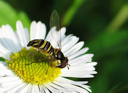

In [14]:
ims = [r"C:\Users\bdacosta\Documents\GitHub\DeepLearning\datasets\flowers\daisy\5547758_eea9edfd54_n.jpg"]
im = Image.open(r"C:\Users\bdacosta\Documents\GitHub\DeepLearning\datasets\flowers\daisy\5547758_eea9edfd54_n.jpg")
im.to_thumb(128,128)

In [17]:
flower_types = 'daisy','dandelion','rose','sunflower','tulip'
path = Path('datasets/flowers')

In [18]:
path

Path('datasets/flowers')

In [19]:
fns = get_image_files(path)
fns

(#3802) [Path('datasets/flowers/daisy/4697206799_19dd2a3193_m.jpg'),Path('datasets/flowers/daisy/4724713781_d169f98a35.jpg'),Path('datasets/flowers/daisy/4727955343_0bb23ac4ae.jpg'),Path('datasets/flowers/daisy/4733590002_f6a70b4f48_n.jpg'),Path('datasets/flowers/daisy/4746633946_23933c0810.jpg'),Path('datasets/flowers/daisy/4753134939_8e87649db6.jpg'),Path('datasets/flowers/daisy/4757448834_a29a9538c9_n.jpg'),Path('datasets/flowers/daisy/476856232_7c35952f40_n.jpg'),Path('datasets/flowers/daisy/476857510_d2b30175de_n.jpg'),Path('datasets/flowers/daisy/4785888250_b661eac225_n.jpg')...]

In [20]:
failed = verify_images(fns)
failed

In [23]:
flowers = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [24]:
dls = flowers.dataloaders(path)

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


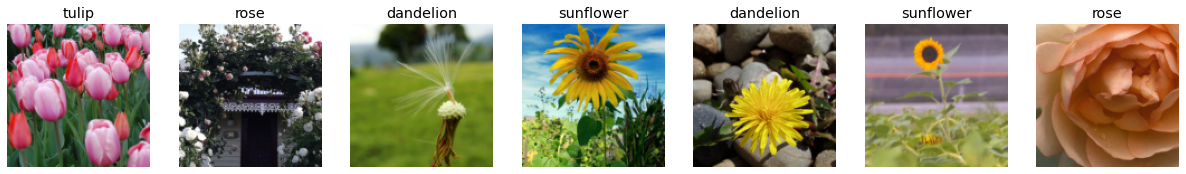

In [29]:
dls.valid.show_batch(max_n=7, nrows=1)


In [30]:
flowers = flowers.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = flowers.dataloaders(path)

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


C:\Python399\lib\site-packages\torch\_tensor.py:1051: UserWarning: torch.solve is deprecated in favor of torch.linalg.solveand will be removed in a future PyTorch release.
torch.linalg.solve has its arguments reversed and does not return the LU factorization.
To get the LU factorization see torch.lu, which can be used with torch.lu_solve or torch.lu_unpack.
X = torch.solve(B, A).solution
should be replaced with
X = torch.linalg.solve(A, B) (Triggered internally at  ..\aten\src\ATen\native\BatchLinearAlgebra.cpp:766.)
  ret = func(*args, **kwargs)


In [31]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to C:\Users\bdacosta/.cache\torch\hub\checkpoints\resnet18-f37072fd.pth
100.0%


epoch,train_loss,valid_loss,error_rate,time


KeyboardInterrupt: 